### assignment_10 수정된 사항
1. 초깃값 문제 - parameter수가 많으면 std를 낮춘다. (Normal에서의 std)
2. cost에 regularization term을 준다. 
3. hidden layer의 수 튜닝, hidden layer의 노드 수 튜닝
4. 데이터수 (train:1000, test:9000) 로 변경하여 fit하기  

## Layer3 + not use given nodes

## data

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

In [0]:
size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

In [0]:
# normalize the values of the input data to be [0, 1]
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

In [0]:
# example of distance function between two vectors x and y
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

## optimization
- randomly initialize weights
- Implement foward propagation to get h(x) for any x
- Implement code to compute cost function J
- Implement backprop to compute partial derivations

- and training the neural network
- Use gradient descent with back propagation to minimize J(theta) as function of parameter theta.


In [0]:
# h, sigmoid함수 정의 
# activation function으로 sigmoid를 사용할 예정에 있음 
def h(theta,X):
  return np.dot(X,theta)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# 미분한 sigmoid식
def Dsigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

In [0]:
# 순전파 함수
# 여기서의 theta는 각 layer별로 해당하는 theta를 전부 포함한 list에 해당한다. 
def Forward(image, theta_vector):
    z_each_layer = []

    # theta의 수대로 반복하고, 그에따라 각각 저장해야 한다. 
    for i in range(len(theta_vector)):
      image = add_bias(image)
      theta = theta_vector[i]
      z = np.dot(image, theta)
      a = sigmoid(z)
      z_each_layer.append(a) # z와 a값 모두 저장한다
      image = a

    return z_each_layer

In [0]:
# label의 원핫인코딩을 위한 함수 
def onehotencoding(label):
  unique = np.unique(label)
  m = label.shape[0]
  n = unique.shape[0]
  empty = np.zeros((m, n))

  for i in range(m):
    for j in range(n):
      if label[i] == unique[j]:
        empty[i, j] = 1
  
  return empty

In [0]:
# Objective function에 대한 정의 
# regularization term추가 (L의 값은 lambda에 해당한다)
def ObjectiveFunction(image, theta_vector,label_list,L ):
  h = Forward(image, theta_vector) # 순전파로 계산한 값의 h(각 layer별로 a값을 출력한다. )
  sigmoid_value = [h[0], h[1], h[2]]
  output_layer = sigmoid_value[-1] # 마지막 h[2]가 결국은 output layer에 해당한다. 
  n = len(theta_vector)# theta의 수에 해당한다, 
  # m = image.shape[0] # 이부분 식 수정해야 하는지 확인하기 

  # cost function에 대해 regularization term을 추가한다. 
  reg_value = 0
  for theta in range(len(theta_vector)): 
    reg_value += np.sum(theta*theta)
  reg_value *= float(L)/(2*n) # m으로 바꿔야 하는지 확인하기 
   
  cost = -np.mean(np.sum(label_list*np.log(output_layer) + (1 - label_list)*np.log(1 - output_layer), axis=1)) #해당 J(theta)값
  
  return cost+reg_value, sigmoid_value

In [0]:
def predict(output_layer):
  predict_label = np.argmax(output_layer, axis=1)
  return predict_label

In [0]:
def accuracy(pred, true):
  acc = np.mean(pred == true)
  return acc 

In [0]:
# bias 추가 
def add_bias(image):
  m = image.shape[0]
  temp = np.column_stack((np.ones((m, 1)), image))
  return temp

In [0]:
# 역전파 함수 수정 
def Back(image, theta_list, onehot, sigmoid_list):
  m = image.shape[0]
  delta4 = sigmoid_list[2] - onehot
  delta3 = np.dot(delta4, theta_list[2][1:, :].T)*sigmoid_list[1]*(1-sigmoid_list[1])
  delta2 = np.dot(delta3, theta_list[1][1:, :].T)*sigmoid_list[0]*(1-sigmoid_list[0])

  add_bias_term3 = add_bias(sigmoid_list[1])
  add_bias_term2 = add_bias(sigmoid_list[0])
  add_bias_term1 = add_bias(image)
  
  gradient3 = np.dot(add_bias_term3.T, delta4) / m
  gradient2 = np.dot(add_bias_term2.T, delta3) / m
  gradient1 = np.dot(add_bias_term1.T, delta2) / m
  gradient_list = [gradient1, gradient2, gradient3]

  return gradient_list

In [0]:
mnist_data = np.array(pd.read_csv(file_data, header=None))

In [0]:
# 전체 데이터 
label = mnist_data[:, 0]
image = mnist_data[:, 1:]

# label데이터 split 
train_label = label[:1000]
test_label = label[1000:]

# image데이터 split
train_image = image[:1000, :]
test_image = image[1000:, :]

# 라벨데이터 원핫 인코딩 
train_onehot = onehotencoding(train_label)
test_onehot = onehotencoding(test_label)

In [0]:
# 먼저 theta의 행렬의 형태에 대한 정의가 필요하다.  
# 랜덤으로 정한 theta (U,V,W)에 해당 
np.random.seed(20180378)
#theta1 = np.random.randn(785, 196)
#theta2 = np.random.randn(197, 49)
#theta3 = np.random.randn(50, 10)

# 파라미터 수를 늘리므로 더작은 std의 N(0,std)에서 랜덤값 뽑을 것임 initializer수정
# 초깃값 너무 작게 두면 기울기 소실이 난다. 적당한 크기로 두는 것이 중요함. 
# N(0,0.01)에서 랜덤값을 initializer한다. 
theta1 = 0.7 * np.random.randn(785, 197) 
theta2 = 0.6 * np.random.randn(198, 79)
theta3 = 0.7 * np.random.randn(80, 10)


# 정한 theta들의 리스트
theta_vector = [theta1, theta2, theta3]
train_cost_value_list = []
test_cost_value_list = []
train_accuracy_list = []
test_accuracy_list = []

## Fit

In [0]:
# hyperparameter값 (튜닝예정 )
iteration = 1500
learning_rate = 1.4
L = 85 # reg term의 lambda값 

In [70]:
for iter in range(iteration):
  # compute cost
  train_cost_value, train_sigmoid_value = ObjectiveFunction(train_image, theta_vector, train_onehot, L)
  test_cost_value, test_sigmoid_value = ObjectiveFunction(test_image, theta_vector, test_onehot, L)
  # predict the final label 
  train_predict_label = predict(train_sigmoid_value[-1])
  test_predict_label = predict(test_sigmoid_value[-1])
  # com
  train_accuracy = accuracy(train_predict_label, train_label)
  test_accuracy = accuracy(test_predict_label, test_label)
  gradient = Back(train_image, theta_vector, train_onehot, train_sigmoid_value)

  train_cost_value_list.append(train_cost_value)
  test_cost_value_list.append(test_cost_value)
  train_accuracy_list.append(train_accuracy)
  test_accuracy_list.append(test_accuracy)

  # theta update 
  for i in range(len(theta_vector)):
    theta_vector[i] = theta_vector[i] - learning_rate * gradient[i]
  
  # update되는 cost, sccuracy값 확인하기 
  if(iter%100 == 0):
    print("train:",train_cost_value, train_accuracy )
    print("test :", test_cost_value, test_accuracy) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


train: 95.4583612103448 0.14
test : 95.06858458608434 0.1348888888888889
train: 71.90257444849043 0.838
test : 72.43546499511008 0.6962222222222222
train: 71.40605345941874 0.944
test : 72.19653226993577 0.7583333333333333
train: 71.18951361950921 0.983
test : 72.16112670369768 0.7743333333333333
train: 71.06998775247729 0.993
test : 72.17300168257977 0.781
train: 71.0020930700016 0.996
test : 72.19857163556853 0.7823333333333333
train: 70.95876544886754 0.998
test : 72.22936255897872 0.7842222222222223
train: 70.93088219810652 0.998
test : 72.25941581074146 0.784
train: 70.91174459062502 0.999
test : 72.28832442498808 0.7835555555555556
train: 70.89836063601166 1.0
test : 72.31431622685457 0.7833333333333333
train: 70.88927427029857 1.0
test : 72.33983072535115 0.7833333333333333
train: 70.88157166523595 1.0
test : 72.36090075171235 0.7828888888888889
train: 70.87559976760672 1.0
test : 72.3787814129732 0.7833333333333333
train: 70.87080135003443 1.0
test : 72.39679241738895 0.7843333

## plotting

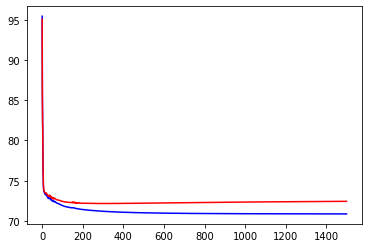

In [71]:
plt.plot(train_cost_value_list,'b') # train
plt.plot(test_cost_value_list,'r') # test

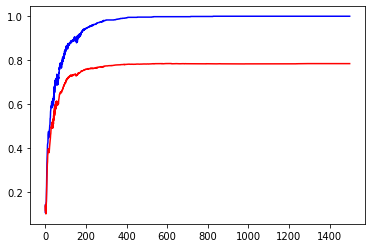

In [72]:
plt.plot(train_accuracy_list,'b')
plt.plot(test_accuracy_list,'r')

In [73]:
print(train_accuracy_list[-1]*100,'%') # final (train)

100.0 %


In [74]:
print(test_accuracy_list[-1]*100,'%') # final (test)

78.42222222222223 %


## plotting classified images(2*5)

In [0]:
# plot the classification example
## 학습이 잘 된 이미지 라벨을 저장한다. 
correct_index = [] 
## 학습이 잘 되지 않은 이미지 라벨을 저장한다. 
miscorrect_index = []

for i in range(len(train_label)):
  if train_predict_label[i] == train_label[i]:
    correct_index.append(i)
  else:
    miscorrect_index.append(i)

In [0]:
corrrect_index = correct_index[:10] # 10개만 확인

In [0]:
# test데이터에 대해 맞게 학습한, 맞지 않게 학습한 index를 저장함. 
correct_index2 = []
miscorrect_index2 = []
correct_label2 = []
miscorrect_label2 = []

for i in range(len(test_label)):
  if test_predict_label[i] == test_label[i]:
    correct_index2.append(i)
    correct_label2.append(test_label[i])
  else:
    miscorrect_index2.append(i)
    miscorrect_label2.append(test_predict_label[i])

In [0]:
correct_index2 = correct_index2[:10] #10개만 확인

In [0]:
miscorrect_index2 = miscorrect_index2[:10] 

In [80]:
test_image[1,:].shape

(784,)

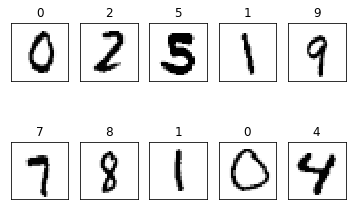

In [81]:
# reshape과정
# test셋에 대하여 correct저장한 값 
count = 0
for i in correct_index2:
  plt.subplot(2, 5, count+1)

  first = test_image[i, :].reshape(28, 28)
  plt.imshow(first, cmap='Greys',interpolation='None')
  plt.title(correct_label2[count])
  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
  count+=1
  if(count==10):
    break

plt.show()


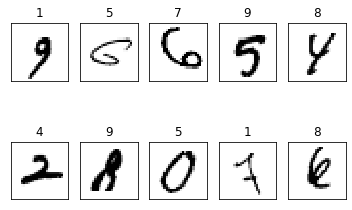

In [82]:
# reshape과정
# test셋에 대하여 miscorrect값을 plotting
count = 0
for i in miscorrect_index2:
  plt.subplot(2, 5, count+1)
  second = test_image[i, :].reshape(28, 28)
  plt.imshow(second, cmap='Greys',interpolation='None')
  plt.title(miscorrect_label2[count])
  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
  count+=1
  if(count==10):
    break

plt.show()

## 답

# 1.Plot the loss curve 

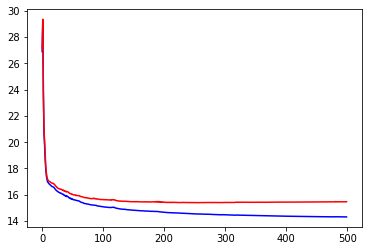

In [0]:
plt.plot(train_cost_value_list,'b')
plt.plot(test_cost_value_list,'r')

## 2. Plot the accuracy curve

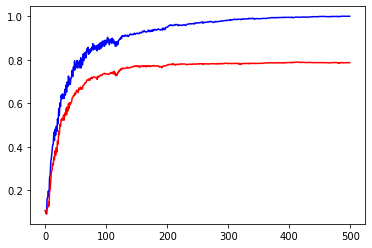

In [0]:
plt.plot(train_accuracy_list,'b')
plt.plot(test_accuracy_list,'r')

## 3. Plot the accuracy value

In [0]:
print('train : ',train_accuracy_list[-1]*100,'%') # train accuracy

train :  100.0 %


In [0]:
print('test:' ,test_accuracy_list[-1]*100,'%')

test: 78.66666666666666 %


## 4. Plot the classification example

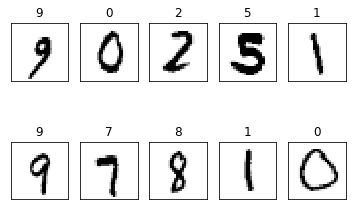

In [0]:
# reshape과정
# test셋에 대하여 correct저장한 값 
count = 0
for i in correct_index2:
  plt.subplot(2, 5, count+1)

  first = test_image[i, :].reshape(28, 28)
  plt.imshow(first, cmap='Greys',interpolation='None')
  plt.title(correct_label2[count])
  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
  count+=1
  if(count==10):
    break

plt.show()


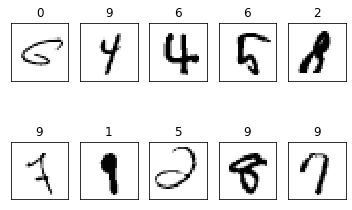

In [0]:
# reshape과정
# test셋에 대하여 miscorrect값을 plotting
count = 0
for i in miscorrect_index2:
  plt.subplot(2, 5, count+1)
  second = test_image[i, :].reshape(28, 28)
  plt.imshow(second, cmap='Greys',interpolation='None')
  plt.title(miscorrect_label2[count]) # mis predicted label
  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
  count+=1
  if(count==10):
    break

plt.show()